In [1]:
import pandas as pd
df = pd.read_csv('games.csv')
#df['created_at'] = pd.to_datetime(df['created_at']).dt.strftime('%Y-%m-%d')
df

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4


Imported Pandas, installing in the Console...

I kept the commented out line to kinda talk about it. I was originally attempting to get the time columns more readable.. I converted them into just one column that showed the length of the game. 
This came out with no values because the actual times that are labeled aren't detailed enough to get an actual value. (3.13e32, they shortened it so it's not accurate.)

In [2]:
df.head()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


(20058, 16)

These three lines I remember from the course are the 3 lines to always run when first looking at data

I used these to get a rough understanding of the data, like it shows all the different columns and also the data types in said columns. In that last (), it tells us there are over 20000 games in this dataset. 

In [3]:
df.isnull().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

Here is summed up the null values found in the dataset. Fortunately for me I had none in this.

In [27]:
df['rated'].value_counts()


rated
True     16155
False     3903
Name: count, dtype: int64

I used value_counts() to show how many of the total games are rated or unrated. 

True for rated games & False for unrated.

In [28]:
df['opening_name'].describe()

count                    20058
unique                    1477
top       Van't Kruijs Opening
freq                       368
Name: opening_name, dtype: object

Using .describe() here to start looking at the openings data. This is the most interesting to me. 

Will use graphs to ask how openings are used across the different ratings.

In [6]:
df['Skill_Level_White'] = ''
df['Skill_Level_Black'] = '' #Created two new columns for skill levels

# White player skill levels
df.loc[df['white_rating'] < 1000, 'Skill_Level_White'] = 'Beginner'
df.loc[(df['white_rating'] >= 1000) & (df['white_rating'] < 2000), 'Skill_Level_White'] = 'Intermediate'
df.loc[df['white_rating'] >= 2000, 'Skill_Level_White'] = 'Advanced'

# Black player skill levels
df.loc[df['black_rating'] < 1000, 'Skill_Level_Black'] = 'Beginner'
df.loc[(df['black_rating'] >= 1000) & (df['black_rating'] < 2000), 'Skill_Level_Black'] = 'Intermediate'
df.loc[df['black_rating'] >= 2000, 'Skill_Level_Black'] = 'Advanced'

df[['white_rating', 'Skill_Level_White', 'black_rating', 'Skill_Level_Black']].head(10)

,white_rating,Skill_Level_White,black_rating,Skill_Level_Black
0,1500,Intermediate,1191,Intermediate
1,1322,Intermediate,1261,Intermediate
2,1496,Intermediate,1500,Intermediate
3,1439,Intermediate,1454,Intermediate
4,1523,Intermediate,1469,Intermediate
5,1250,Intermediate,1002,Intermediate
6,1520,Intermediate,1423,Intermediate
7,1413,Intermediate,2108,Advanced
8,1439,Intermediate,1392,Intermediate
9,1381,Intermediate,1209,Intermediate


It was very important here to split the ratings system into skill levels. This will be used to streamline the ratings for quick and easy data graphs.

In [7]:
df.dtypes

id                    object
rated                   bool
created_at           float64
last_move_at         float64
turns                  int64
victory_status        object
winner                object
increment_code        object
white_id              object
white_rating           int64
black_id              object
black_rating           int64
moves                 object
opening_eco           object
opening_name          object
opening_ply            int64
Skill_Level_White     object
Skill_Level_Black     object
dtype: object

This is just checking all the different types of values used in the data set to make sure I know how to use them.

In [8]:
# Converting the time stuff to just length of game in minutes
#df['game_length_ms'] = df['last_move_at'] - df['created_at']
#df['game_length_min'] = df['game_length_ms'] / 60000

# Checking new column
#df[['created_at', 'last_move_at', 'game_length_ms', 'game_length_min']].head()

# This dataset's time columns aren't precise enough to get good data so I'm deleting them. Cleaning and removing other useless columns here as well.
#df = df.drop(columns=['created_at', 'last_move_at', 'game_length_ms'])
df.drop(columns=['id', 'opening_eco', 'opening_ply', 'created_at', 'last_move_at', 'increment_code'], inplace=True)

df.head()


,rated,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,moves,opening_name,Skill_Level_White,Skill_Level_Black
0,False,13,outoftime,white,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,Slav Defense: Exchange Variation,Intermediate,Intermediate
1,True,16,resign,black,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,Nimzowitsch Defense: Kennedy Variation,Intermediate,Intermediate
2,True,61,mate,white,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,King's Pawn Game: Leonardis Variation,Intermediate,Intermediate
3,True,61,mate,white,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,Queen's Pawn Game: Zukertort Variation,Intermediate,Intermediate
4,True,95,mate,white,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,Philidor Defense,Intermediate,Intermediate


The commented out lines are all from trying to fix the game times to being usable. It is technically working, but the values are all zero as the original values are not the whole values. They were all shortened and therefore unusable.

Instead I dropped all the uneeded columns. Including those game time ones. It is dissapointing as I was wanting to see if how much difference in game lengths between different skill levels. I pivoted later to use the number of moves in games instead of the time.

In [9]:
# Sorting data by White Rating (High to Low)
df_sorted = df.sort_values(by='white_rating', ascending=False)
df_sorted.head()

,rated,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,moves,opening_name,Skill_Level_White,Skill_Level_Black
13009,False,20,resign,white,justicebot,2700,youredeadmeat,1486,e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 N1e2 Nf6...,Caro-Kann Defense: Classical Variation,Advanced,Intermediate
10147,True,149,resign,white,blitzbullet,2622,milancuruvija,2188,e4 Nc6 Nf3 d5 exd5 Qxd5 Nc3 Qa5 d4 Bg4 Be3 O-O...,Nimzowitsch Defense | Declined Variation,Advanced,Advanced
11602,False,143,resign,white,lance5500,2621,anonymous_enemy,1500,d4 Nf6 c4 e6 Nf3 Bb4+ Bd2 Qe7 g3 b6 Bg2 Bb7 O-...,Bogo-Indian Defense: Nimzowitsch Variation,Advanced,Intermediate
12613,False,47,resign,white,lance5500,2621,koryakinrus,1715,d4 Nf6 c4 g6 Nc3 d5 Bg5 dxc4 e4 Bg7 Bxc4 O-O h...,Gruenfeld Defense: Stockholm Variation,Advanced,Intermediate
12611,False,30,resign,black,lance5500,2621,koryakinrus,1715,e4 e5 Nf3 Nc6 Bc4 Nf6 Ng5 Bc5 Bxf7+ Ke7 Bb3 d6...,Italian Game: Two Knights Defense | Traxler C...,Advanced,Intermediate


Here the dataset is sorted to show games of white player's with the highest ratings. I wanted to see what the top ratings in this data set were.

In [10]:
# Grouping by victory status to see most common
df.groupby('victory_status').size().sort_values(ascending=False)

victory_status
resign       11147
mate          6325
outoftime     1680
draw           906
dtype: int64

Same as the last block, but now checking for black ratings.

In [11]:
# Grouping by color win
df.groupby('winner').size()

winner
black     9107
draw       950
white    10001
dtype: int64

Here .groupby() is used to see the descrepency in which color won and draws. 

I wanted to see as theoretically it is known white should win due to moving first so wanted to see what the data showed for that.

In [12]:
# Now what does it show by skill level?
df.groupby('Skill_Level_White')['winner'].value_counts()

Skill_Level_White  winner
Advanced           white     1116
                   black      572
                   draw       119
Beginner           black      179
                   white       61
                   draw         7
Intermediate       white     8824
                   black     8356
                   draw       824
Name: count, dtype: int64

Same as above but wanted to see the difference per skill rating. There is a massive difference inbetween the skill ratings. 

Advanced rating, white nearly wins double the amounts of time. And in beginner black wins more than double. Intermediate is more inline with the theoretical amount.

In [13]:
#What are the highest rated games?
df.sort_values(by=['white_rating', 'black_rating'], ascending=False).head(10)

,rated,turns,victory_status,winner,white_id,white_rating,black_id,black_rating,moves,opening_name,Skill_Level_White,Skill_Level_Black
13009,False,20,resign,white,justicebot,2700,youredeadmeat,1486,e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 N1e2 Nf6...,Caro-Kann Defense: Classical Variation,Advanced,Intermediate
10147,True,149,resign,white,blitzbullet,2622,milancuruvija,2188,e4 Nc6 Nf3 d5 exd5 Qxd5 Nc3 Qa5 d4 Bg4 Be3 O-O...,Nimzowitsch Defense | Declined Variation,Advanced,Advanced
19016,False,69,resign,white,lance5500,2621,chessmageddon,2206,e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 a6 Bc4 e5 Nf...,Sicilian Defense: Najdorf | Lipnitsky Attack,Advanced,Advanced
11949,False,40,resign,black,lance5500,2621,danny77,2150,e4 e5 Nf3 Nf6 d4 Nxe4 Bd3 d5 Nxe5 Bd6 Qe2 O-O ...,Russian Game: Modern Attack | Center Variation,Advanced,Advanced
11953,False,58,outoftime,black,lance5500,2621,danny77,2150,d3 d5 Nf3 Nf6 g3 c5 Bg2 Nc6 O-O e5 c4 d4 e3 Bd...,Zukertort Opening: Old Indian Attack,Advanced,Advanced
11958,False,42,resign,black,lance5500,2621,danny77,2139,e4 e5 Nf3 Nc6 Bc4 Nf6 Ng5 d5 exd5 Na5 Bb5+ c6 ...,Italian Game: Two Knights Defense | Polerio D...,Advanced,Advanced
12447,False,49,resign,white,lance5500,2621,lukarpov,1802,d4 Nf6 c4 e6 Nf3 d5 Nc3 Be7 Bg5 h6 Bh4 O-O e3 ...,Queen's Gambit Declined: Tartakower Variation ...,Advanced,Intermediate
12449,False,77,resign,white,lance5500,2621,lukarpov,1802,d4 Nf6 c4 e6 Nf3 d5 Nc3 Be7 Bg5 O-O e3 h6 Bh4 ...,Queen's Gambit Declined: Tartakower Variation ...,Advanced,Intermediate
11584,False,14,resign,white,lance5500,2621,thechessdetective,1770,e4 e5 Nf3 Nc6 Bc4 Nf6 Ng5 d5 exd5 Nxd5 d4 Bd7 ...,Italian Game: Two Knights Defense | Lolli Attack,Advanced,Intermediate
12610,False,47,outoftime,white,lance5500,2621,koryakinrus,1715,e4 e5 Nf3 Nc6 Bc4 Nf6 Ng5 d5 exd5 Na5 Bb5+ c6 ...,Italian Game: Two Knights Defense | Polerio D...,Advanced,Intermediate


Here .value_counts() is used to show the 10 top rated games between both white and black players. Most interesting about this top level of play... Absolutely none of them ended in the traditional mate. Either out of time or resignations.

In [14]:
# What's the most common opening?
df['opening_name'].value_counts().head(10)

opening_name
Van't Kruijs Opening                             368
Sicilian Defense                                 358
Sicilian Defense: Bowdler Attack                 296
French Defense: Knight Variation                 271
Scotch Game                                      271
Scandinavian Defense: Mieses-Kotroc Variation    259
Queen's Pawn Game: Mason Attack                  232
Queen's Pawn Game: Chigorin Variation            229
Scandinavian Defense                             223
Horwitz Defense                                  209
Name: count, dtype: int64

Here .value_counts is used to see, overall, what are the most used openings? 

I personally have never heard of the top opening.. But most of the others do make sense.

In [15]:
# What about by White skill level?
df.groupby('Skill_Level_White')['opening_name'].value_counts().head(10)

Skill_Level_White  opening_name                                 
Advanced           Indian Game                                      18
                   Queen's Pawn Game: London System                 17
                   Scandinavian Defense: Mieses-Kotroc Variation    17
                   Horwitz Defense                                  16
                   Queen's Pawn Game: Mason Attack                  16
                   Caro-Kann Defense: Exchange Variation            14
                   Modern Defense                                   14
                   Queen's Pawn Game: Chigorin Variation            14
                   Sicilian Defense                                 14
                   Queen's Gambit Declined                          13
Name: count, dtype: int64

Here the same is done but now by white skill tiers. This is interesting to see how the different levels of play differ on the openings.

In [16]:
# What about by Black skill level?
df.groupby('Skill_Level_Black')['opening_name'].value_counts().head(10)

Skill_Level_Black  opening_name                      
Advanced           Indian Game                           31
                   French Defense: Knight Variation      21
                   French Defense: Exchange Variation    19
                   Queen's Pawn Game: Mason Attack       18
                   Sicilian Defense                      18
                   Sicilian Defense: Old Sicilian        18
                   Queen's Pawn Game: London System      17
                   Modern Defense                        15
                   Sicilian Defense: Bowdler Attack      14
                   Sicilian Defense: French Variation    13
Name: count, dtype: int64

Same as above but for Black

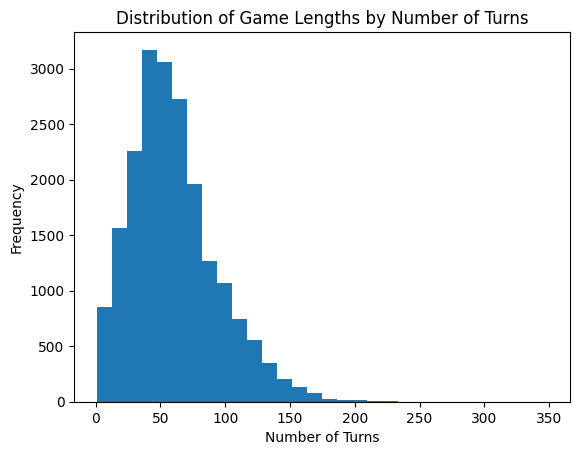

In [18]:
#A plt to show all games by number of moves
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['turns'], bins=30)
plt.xlabel('Number of Turns')
plt.ylabel('Frequency')
plt.title('Distribution of Game Lengths by Number of Turns')
plt.show()

Here a chart details out the games by the number of turns. 

Most games last between 50 - 100 moves. It would be interesting to do this based on skill level as well and something I should add in. 

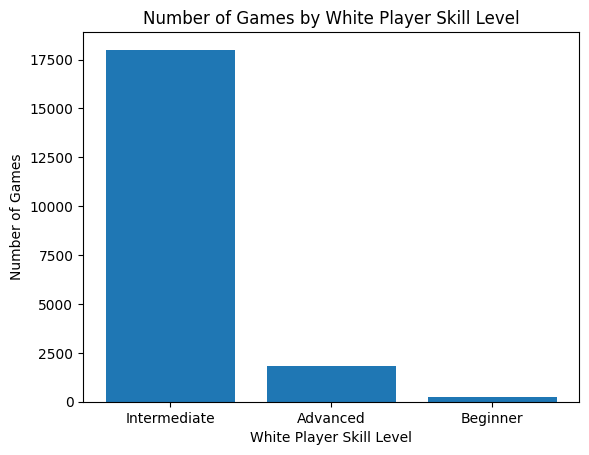

In [19]:
#How many games in each skill level?
skill_counts = df['Skill_Level_White'].value_counts()

plt.figure()
plt.bar(skill_counts.index, skill_counts.values)
plt.xlabel('White Player Skill Level')
plt.ylabel('Number of Games')
plt.title('Number of Games by White Player Skill Level')
plt.show()

This chart clearly shows the amount of data on each skill level 

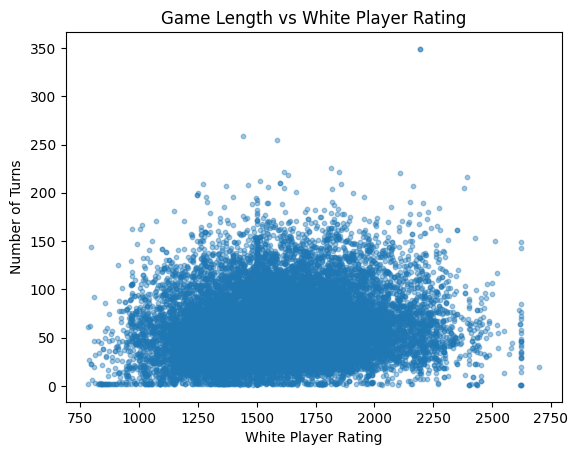

In [26]:
#Does game length vary by skill level?

plt.figure()
plt.scatter(df['white_rating'], df['turns'], s=10, alpha=0.4)
plt.xlabel('White Player Rating')
plt.ylabel('Number of Turns')
plt.title('Game Length vs White Player Rating')
plt.show()

This graph was made to see the data of game lengths in number of turns as compared to the ratings of each game. 

Mostly all games are anywhere between a very few moves, and 100 it seems. it is interesting to see at the top ratings around 2600 that there is a density showing a bit fewer than 50 moves.

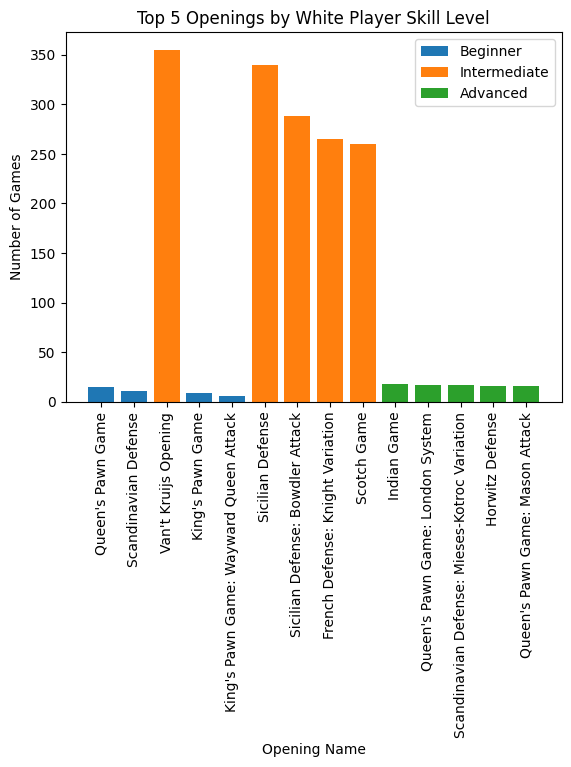

In [22]:
# Chart showing Most common openings by skill level for white

white_openings = (
    df.groupby(['Skill_Level_White', 'opening_name'])
    .size()
    .reset_index(name='count')
)

plt.figure()
for skill in ['Beginner', 'Intermediate', 'Advanced']:
    top = white_openings[
        white_openings['Skill_Level_White'] == skill
    ].sort_values('count', ascending=False).head(5)

    plt.bar(top['opening_name'], top['count'], label=skill)

plt.xlabel('Opening Name')
plt.ylabel('Number of Games')  
plt.title('Top 5 Openings by White Player Skill Level')
plt.xticks(rotation=90)
plt.legend()
plt.show()

The above graph shows the most popular openings per each skill level in the white players. 

It's interesting to see there is no overlap inbetween the skill levels. That was a question I wished to see.. How much of an overlap, or if perhaps everyone is using a "meta" generally appears to not be the case.

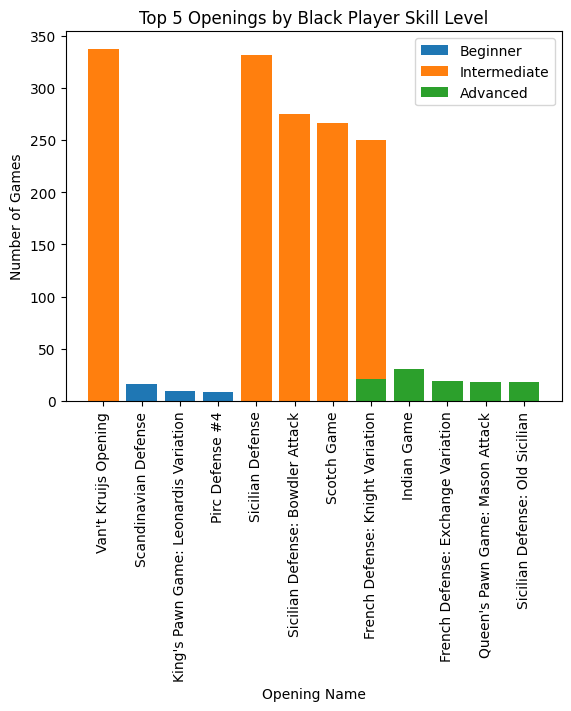

In [24]:
# Chart showing Most common openings by skill level for black

black_openings = (
    df.groupby(['Skill_Level_Black', 'opening_name'])
      .size()
      .reset_index(name='count')
)

plt.figure()
for skill in ['Beginner', 'Intermediate', 'Advanced']:
    top = black_openings[
        black_openings['Skill_Level_Black'] == skill
    ].sort_values('count', ascending=False).head(5)

    plt.bar(top['opening_name'], top['count'], label=skill)

plt.xlabel('Opening Name')
plt.ylabel('Number of Games')
plt.title('Top 5 Openings by Black Player Skill Level')
plt.xticks(rotation=90)
plt.legend()
plt.show()

This is a secondary graph to the last one. Shows the same but for black players.

Was interested to see where the sicilian ranked in the top players as I had already assumed it was black's top opening. The data supports this as it is one of the top openings for both intermediate and advanced players.

TODO List
requirements.txt file
README.md file